# SMS Spam Detection 📱
This notebook demonstrates an end-to-end machine learning pipeline for classifying SMS messages as spam or ham.

## Sections
1. Import Libraries
2. Load Dataset
3. Data Cleaning & Preprocessing
4. Exploratory Data Analysis (EDA)
5. Feature Engineering (TF-IDF)
6. Model Training (Naive Bayes, Logistic Regression)
7. Model Evaluation
8. Results & Conclusion

# SMS Spam Detection

In [1]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv('spam.csv',encoding="latin1")

In [5]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4573,ham,:( but your not here....,NaN,NaN,NaN
3092,ham,staff.science.nus.edu.sg/~phyhcmk/teaching/pc1323,NaN,NaN,NaN
2893,ham,K...k...yesterday i was in cbe .,NaN,NaN,NaN
2785,ham,Yeah get the unlimited,NaN,NaN,NaN
248,ham,It didnt work again oh. Ok goodnight then. I.l...,NaN,NaN,NaN


In [7]:
df.shape

(5572, 5)

# 1. Data Cleaning

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [11]:
df.drop(columns=['Unnamed: 2',	'Unnamed: 3',	'Unnamed: 4'],inplace=True)

In [13]:
df.sample(5)

,v1,v2
2600,ham,"As usual..iam fine, happy &amp; doing well..:)"
4792,ham,Or u ask they all if next sat can a not. If al...
4769,ham,CHEERS LOU! YEAH WAS A GOODNITE SHAME U NEVA C...
2606,ham,R U &SAM P IN EACHOTHER. IF WE MEET WE CAN GO ...
1574,ham,My sis is catching e show in e afternoon so i'...


In [15]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [17]:
df.sample(5)

,target,text
1503,ham,Ill be there on &lt;#&gt; ok.
4576,spam,Had your contract mobile 11 Mnths? Latest Moto...
4479,ham,Y cant u try new invention to fly..i'm not jok...
3735,ham,Hows the street where the end of library walk is?
2429,spam,Guess who am I?This is the first time I create...


In [19]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [21]:
encoder.fit_transform(df['target'])

array([0, 0, 1, ..., 0, 0, 0])

In [23]:
df['target']=encoder.fit_transform(df['target'])

In [25]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [27]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [29]:
df.duplicated().sum()

403

In [31]:
df.drop_duplicates(keep='first')

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [33]:
df=df.drop_duplicates(keep='first')

In [35]:
df.duplicated().sum()

0

In [37]:
df.shape

(5169, 2)

# 2. Exploratory Data Analyis (EDA)

In [39]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

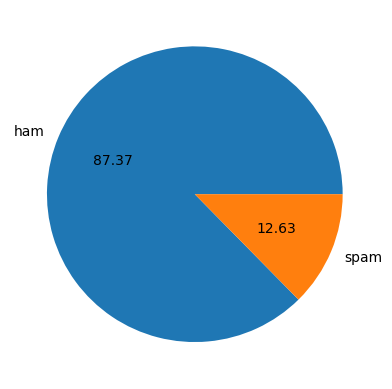

In [41]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [43]:
!pip install nltk

In [44]:
import nltk

In [45]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [49]:
df['num_character']=df['text'].apply(len)

In [51]:
df.head()

,target,text,num_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [53]:
df['text'].apply(lambda x:nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

In [55]:
df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: text, Length: 5169, dtype: int64

In [57]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [59]:
df.head()

,target,text,num_character,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [61]:
df['text'].apply(lambda x:nltk.sent_tokenize(x))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will Ì_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: text, Length: 5169, dtype: object

In [63]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [65]:
df.head()

,target,text,num_character,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [67]:
df[['num_character','num_words','num_sentences']].describe()

,num_character,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [69]:
df[df['target']==0][['num_character','num_words','num_sentences']].describe()

,num_character,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [71]:
df[df['target']==1][['num_character','num_words','num_sentences']].describe()

,num_character,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [73]:
import seaborn as sns

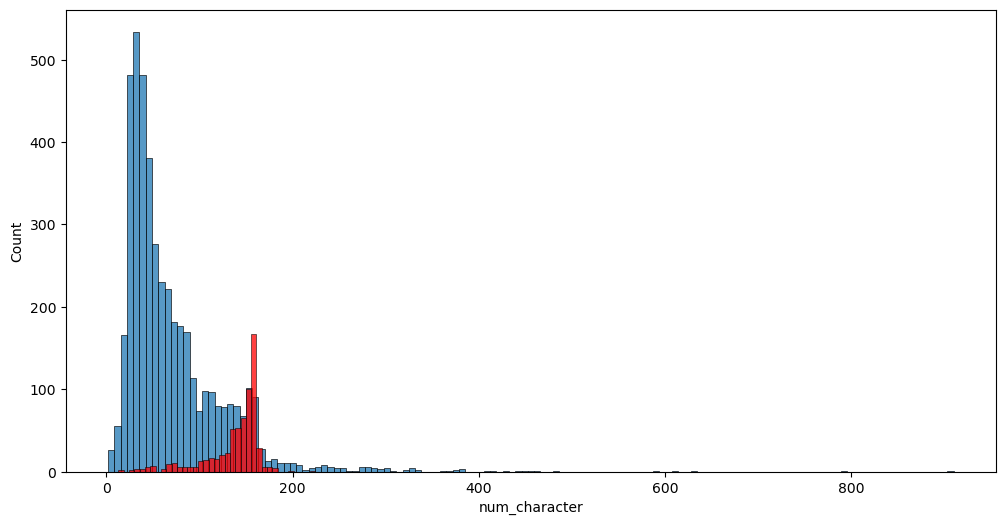

In [75]:
plt.figure(figsize=(12,6))#just to increase the figure size
sns.histplot(df[df['target']==0]['num_character'])
sns.histplot(df[df['target']==1]['num_character'],color='red')
plt.show()

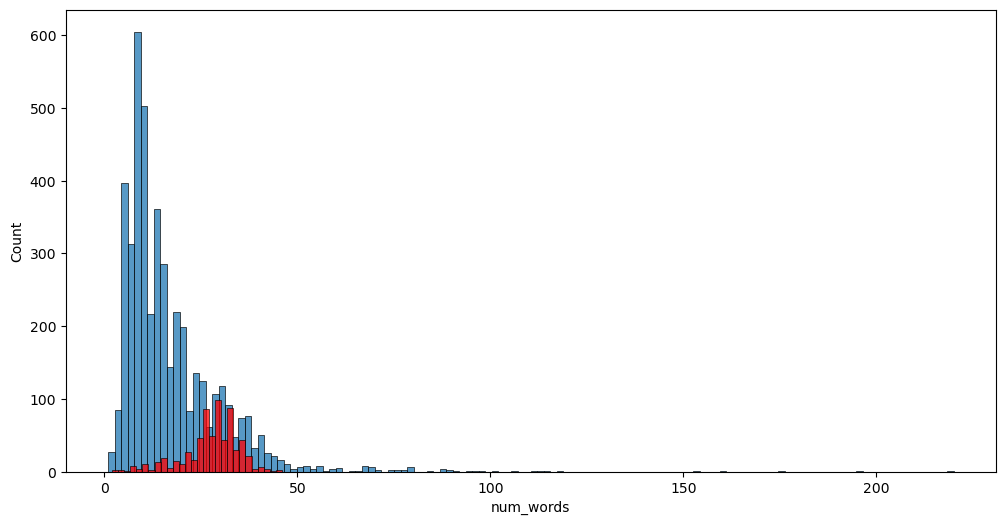

In [77]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')
plt.show()

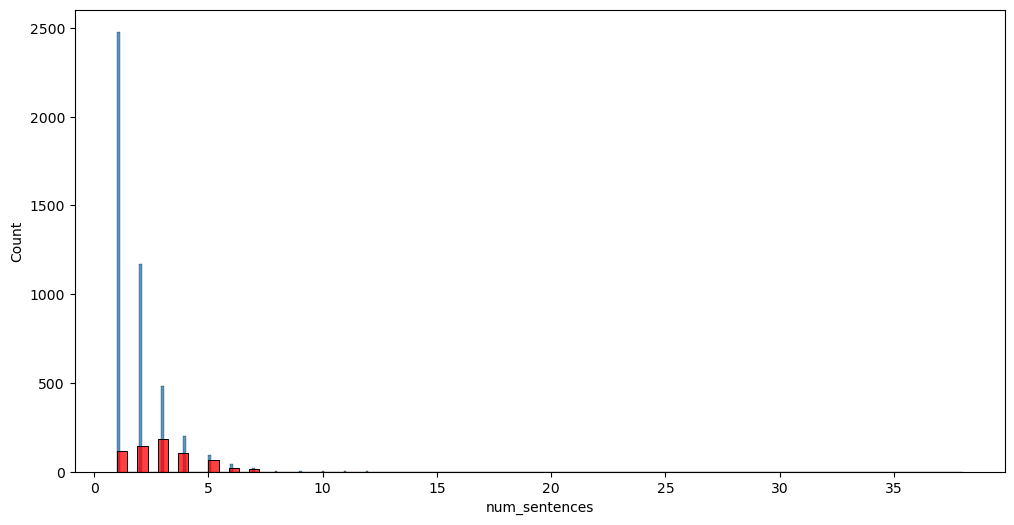

In [79]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_sentences'])
sns.histplot(df[df['target']==1]['num_sentences'],color='red')
plt.show()

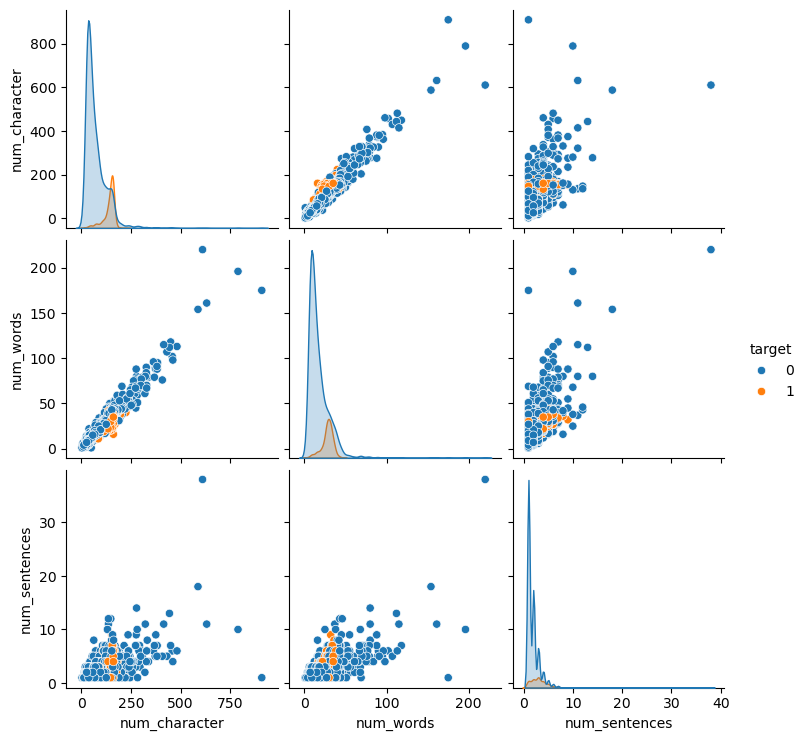

In [81]:
sns.pairplot(df,hue='target')
plt.show()

In [83]:
df.head()

,target,text,num_character,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


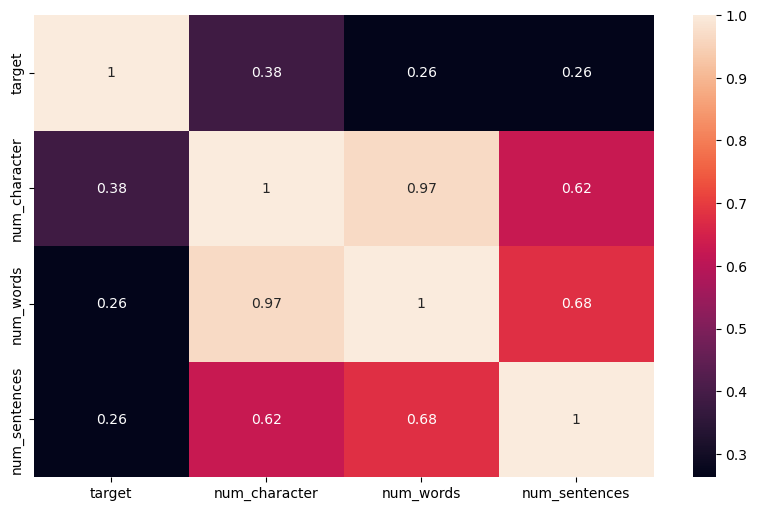

In [85]:
numeric_df = df.select_dtypes(include=['number'])
corr = numeric_df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True)
plt.show()

# 3.Text Preprocesing

## lower case
## tokenization
## removing special characters
## stemming

In [87]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [89]:
from nltk.corpus import stopwords

In [91]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [93]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('dancing')
ps.stem('loving')

'love'

In [95]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y.copy()
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [97]:
transform_text('i loved the yt lectures on machine learning . how about you?')

'love yt lectur machin learn'

In [99]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [101]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [103]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [105]:
df['transformed_text']=df['text'].apply(transform_text)

In [106]:
df.head()

,target,text,num_character,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [107]:
!pip install wordcloud

In [110]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [115]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

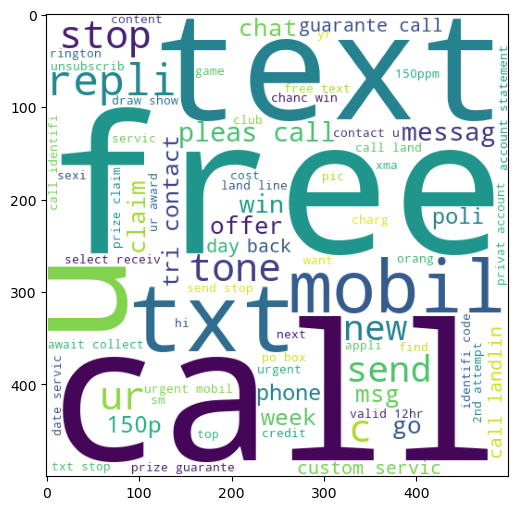

In [119]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)
plt.show()

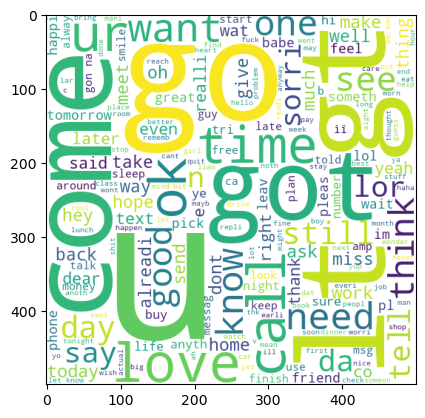

In [123]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
plt.imshow(ham_wc)
plt.show()

In [125]:
df.head()

,target,text,num_character,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [127]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [129]:
len(spam_corpus)

9939

In [131]:
from collections import Counter 

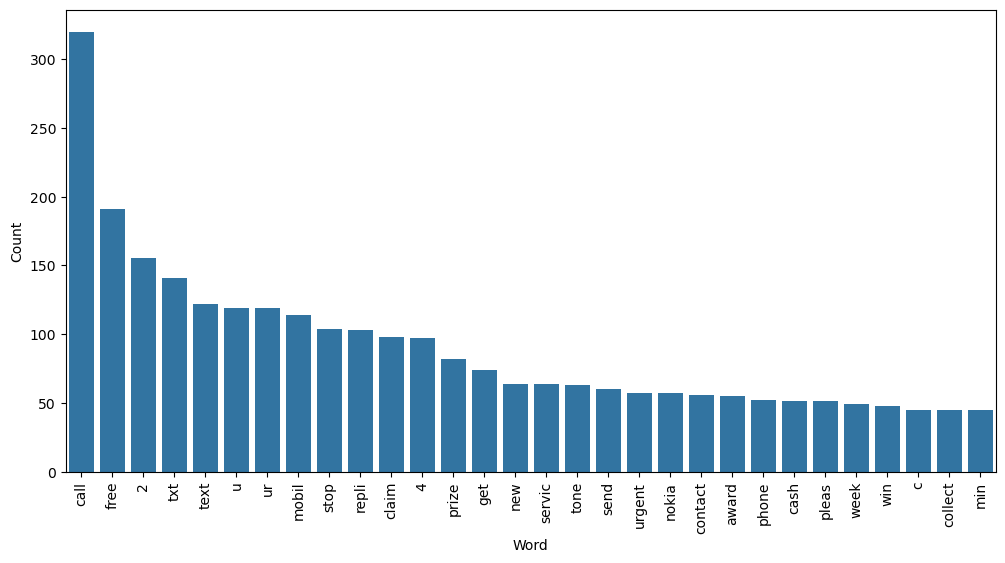

In [133]:
top_30 = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['Word', 'Count'])
# Plot
plt.figure(figsize=(12,6))
sns.barplot(x="Word", y="Count", data=top_30)
plt.xticks(rotation=90)
plt.show()

In [137]:
len(ham_corpus)

35404

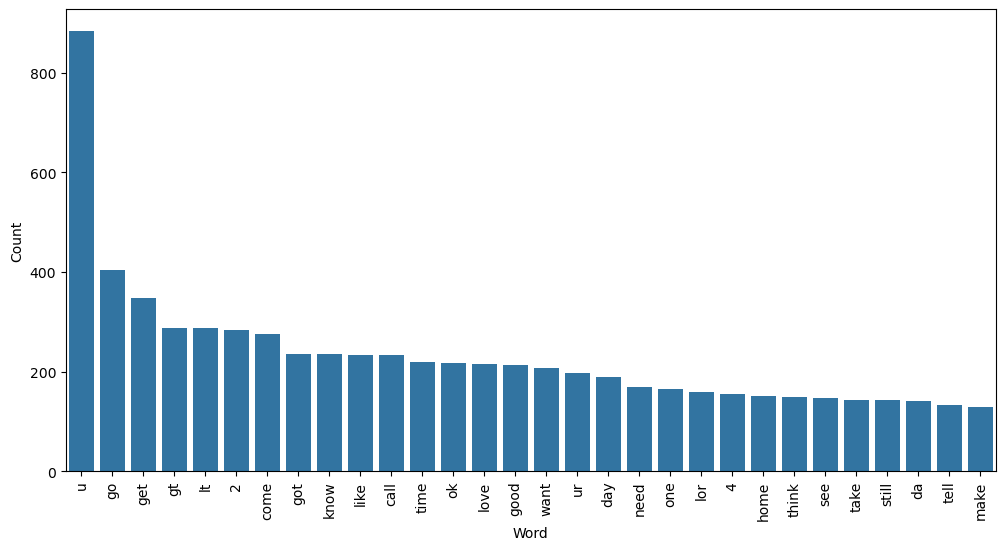

In [139]:
top_30 = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['Word', 'Count'])
# Plot
plt.figure(figsize=(12,6))
sns.barplot(x="Word", y="Count", data=top_30)
plt.xticks(rotation=90)
plt.show()

# 4. Model Building

In [142]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [144]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [146]:
X.shape

(5169, 3000)

In [148]:
y=df['target'].values

In [150]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [152]:
from sklearn.model_selection import train_test_split

In [154]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [156]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [158]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [160]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [162]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [164]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [166]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [168]:
print(mnb.classes_)

[0 1]


In [170]:
import pickle

# vectorizer aur model load karo
tfidf = pickle.load(open('vectorizer.pkl', 'rb'))
mnb = pickle.load(open('model.pkl', 'rb'))

def predict_sms(text):
    vector = tfidf.transform([text])
    label = mnb.predict(vector)[0]
    return "This message is SPAM 🚨" if label == 1 else "This message is Not Spam ✅"

# user se input lena
user_sms = input("Enter an SMS: ")
print(predict_sms(user_sms))

Enter an SMS:  hi how are you


This message is Not Spam ✅


In [172]:
import pickle

# vectorizer aur model load karo
tfidf = pickle.load(open('vectorizer.pkl', 'rb'))
mnb = pickle.load(open('model.pkl', 'rb'))

# ek helper function
def predict_sms(text):
    # text ko vectorize karo
    vector = tfidf.transform([text])
    # model se prediction lo
    label = mnb.predict(vector)[0]
    return "SPAM" if label == 1 else "HAM"

# Example tests
print(predict_sms("Congratulations! You have won a lottery. Claim now!"))
print(predict_sms("Hey, are we meeting tomorrow?"))

SPAM
HAM
